In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.shape

(244, 7)

In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [40]:
tips_df.corr()

/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_14236/3176592554.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_14236/1409807705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips_df.corr());


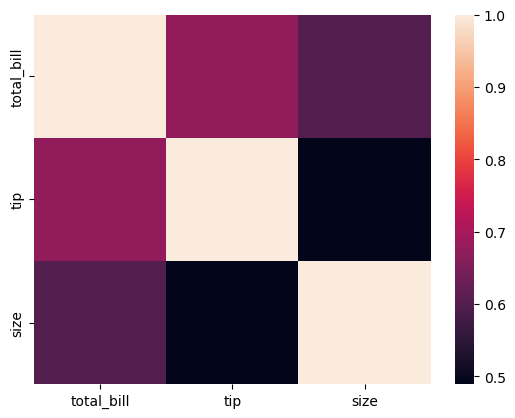

In [43]:
sns.heatmap(tips_df.corr());

## EDA

In [6]:
numericals = tips_df.select_dtypes(include=np.number)
categoricals= tips_df.select_dtypes(include='category')

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

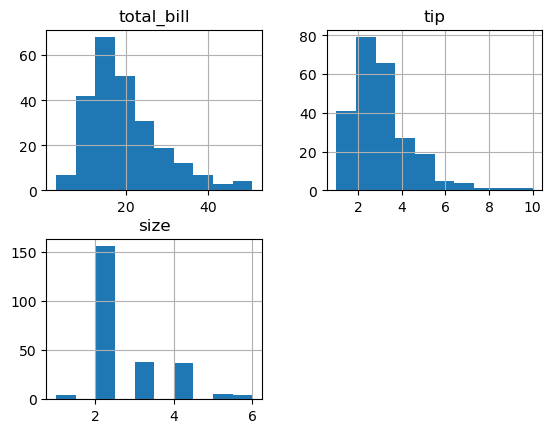

In [7]:
#plotting histograms
numericals.hist()

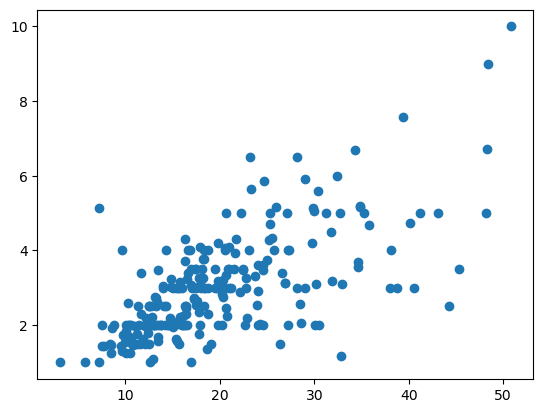

In [8]:
plt.scatter(x=numericals["total_bill"], y=numericals["tip"])

## Preprocessing - Categorical variables encoding

In [44]:
cat_encoded = pd.get_dummies(categoricals)

In [45]:
final_df = pd.concat([numericals,cat_encoded],axis=1)

### Xy split

In [46]:
X = final_df.drop(columns="tip")
y = final_df["tip"]

In [47]:
X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


### Train-test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Scaling / Standardizing / PowerTransforming

In [50]:
np.array(y_train).reshape(-1,1).shape

(183, 1)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##powertransform response
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(np.array(y_train).reshape(-1,1))
y_train_t = pt.transform(np.array(y_train).reshape(-1,1))
y_test_t = pt.transform(np.array(y_test).reshape(-1,1))

## Modelling

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
#model fitting
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train_t)

In [54]:
y_pred = model.predict(X_test_scaled)

In [55]:
y_test_t = y_test_t.reshape(61,)

In [56]:
y_pred = y_pred.reshape(61,)

In [57]:
residual_df = pd.DataFrame({'y_test':y_test_t,'y_pred':y_pred, 'res':y_pred-y_test_t})

In [58]:
residual_df

,y_test,y_pred,res
0,0.308734,-0.177948,-0.486683
1,-0.772802,-0.777069,-0.004267
2,-0.772802,0.566681,1.339483
3,1.399783,0.444122,-0.955661
4,-0.772802,-0.550045,0.222757
...,...,...,...
56,1.395564,-0.966522,-2.362087
57,-1.081754,-0.302948,0.778806
58,-0.037641,-0.066132,-0.028491
59,0.173547,-0.368378,-0.541924


In [59]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [60]:
model_mse = mse(y_test_t, y_pred)
model_r2 = r2(y_test_t,y_pred)
model_rmse = np.sqrt(model_mse)

In [61]:
model_r2, model_mse, model_rmse

(0.41786617135057835, 0.5240881674891176, 0.7239393396474028)

### Feature importance

In [62]:
model.coef_

array([[ 5.62937414e-01,  1.57691018e-01, -1.31905895e+13,
        -1.31905895e+13, -7.61700388e+13, -7.61700388e+13,
        -6.16477890e+12, -4.04380246e+12, -6.87442857e+12,
        -6.59732044e+12, -1.71439060e+12, -1.71439060e+12]])

In [63]:
model.intercept_

array([-0.00043469])

In [64]:
fi_df = pd.DataFrame({'var': X_train.columns, 'coef': model.coef_.flatten()})

In [65]:
fi_df

,var,coef
0,total_bill,5.629374e-01
1,size,1.576910e-01
2,sex_Male,-1.319059e+13
3,sex_Female,-1.319059e+13
4,smoker_Yes,-7.617004e+13
5,smoker_No,-7.617004e+13
6,day_Thur,-6.164779e+12
7,day_Fri,-4.043802e+12
8,day_Sat,-6.874429e+12
9,day_Sun,-6.597320e+12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'total_bill'),
  Text(1, 0, 'size'),
  Text(2, 0, 'sex_Male'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'smoker_Yes'),
  Text(5, 0, 'smoker_No'),
  Text(6, 0, 'day_Thur'),
  Text(7, 0, 'day_Fri'),
  Text(8, 0, 'day_Sat'),
  Text(9, 0, 'day_Sun'),
  Text(10, 0, 'time_Lunch'),
  Text(11, 0, 'time_Dinner')])

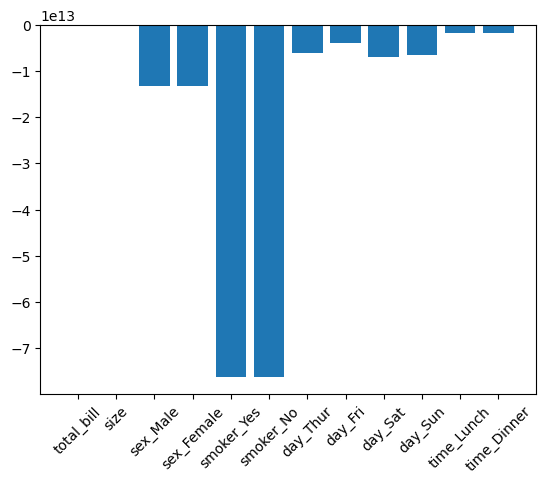

In [66]:
plt.bar(x=fi_df["var"], height=fi_df["coef"])
plt.xticks(rotation=45)

In [67]:
X['total_bill'].max()

50.81

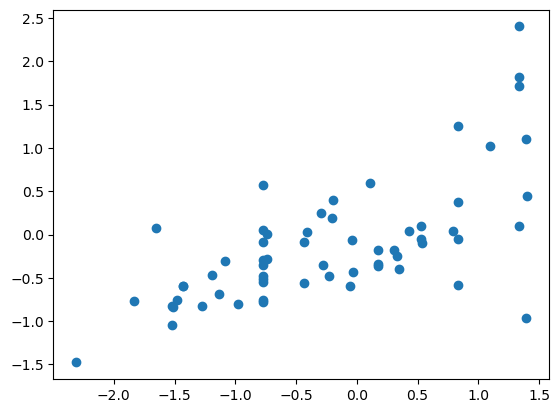

In [68]:
# y_pred vs y_test
plt.scatter(x=y_test_t, y = y_pred)

<Axes: >

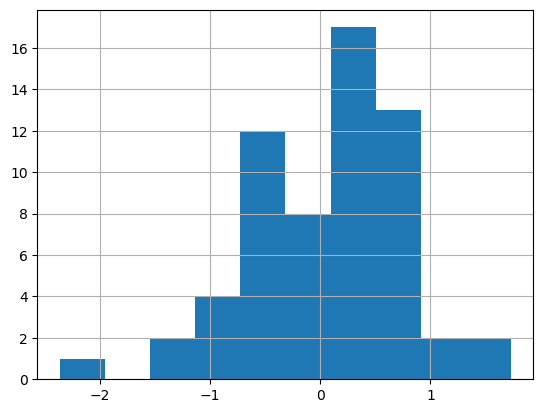

In [69]:
# distribution of residuals
residual_df['res'].hist()

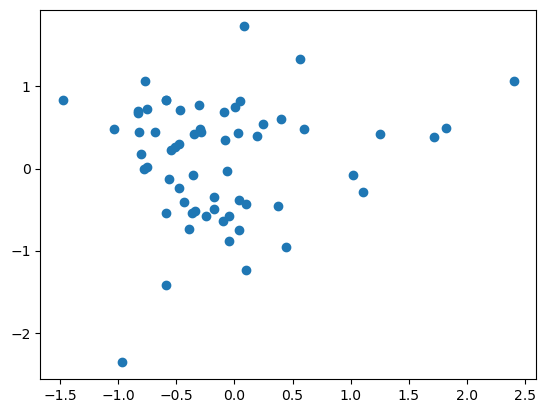

In [70]:
# checking for homoscedasticity (constant variance of residuals)
plt.scatter(x=residual_df["y_pred"],y=residual_df["res"])

In [72]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.4782824053639242, Test -> 0.3504334496770184


In [71]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.4782824053639242, Test -> 0.3504334496770185


/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_14236/679042463.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.892e+01, tolerance: 3.792e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd

In [73]:
model=Ridge(alpha=0) #if we increase alpha we are shrinking the circle and the model performance drops
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.4713177171776374, Test -> 0.4023654942839434


In [85]:
def LinReg (model, X_train, y_train):
    model_=model()
    model_.fit(X_train, y_train)
    train_score = model_.score(X_train, y_train)
    test_score = model_.score(X_test, y_test)
    return train_score, test_score


In [87]:
LinReg(Lasso, X_train, y_train)
    

(0.44556185648499047, 0.45564084758769363)

In [93]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [99]:
def LinReg(model, X_train, X_test, y_train, y_test, feature_selection=None, n_features_to_select=5):
    model_ = model()
    
    if feature_selection == 'pvalue':
       
        model_pvalue = sm.OLS(y_train, X_train).fit()
        p_values = model_pvalue.pvalues
        selected_features = p_values[p_values <= 0.05].index
        X_train = X_train[selected_features]
        X_test = X_test[selected_features]
        
        
    elif feature_selection == 'rfe':
   
        rfe = RFE(model_, n_features_to_select)
        rfe.fit(X_train, y_train)
        selected_features = X_train.columns[rfe.support_]
        X_train = X_train[selected_features]
        X_test = X_test[selected_features]
    
    model_.fit(X_train, y_train)
    train_score = model_.score(X_train, y_train)
    test_score = model_.score(X_test, y_test)
    
    return train_score, test_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_score, test_score = LinReg(LinearRegression, X_train, X_test, y_train, y_test, feature_selection='pvalue')
print(f"Model with P-value selected features: Train -> {train_score}, Test -> {test_score}")

train_score, test_score = LinReg(LinearRegression, X_train, X_test, y_train, y_test, feature_selection='rfe')
print(f"Model with RFE selected features: Train -> {train_score}, Test -> {test_score}")


Model with P-value selected features: Train -> 0.45559096661985954, Test -> 0.4507089585036145


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given